In [12]:
# Install Ultralytics YOLO package
!pip install ultralytics

# Install OpenCV for image processing
!pip install opencv-python-headless

# Matplotlib is usually pre-installed in Colab, but you can install it if needed
!pip install matplotlib
# OpenCV for image processing

# Pillow (PIL) for image handling
!pip install Pillow

# NumPy (usually pre-installed on Colab)
!pip install numpy

# IPython for interactive widgets and display (should already be installed)
!pip install ipython


<IPython.core.display.Javascript object>

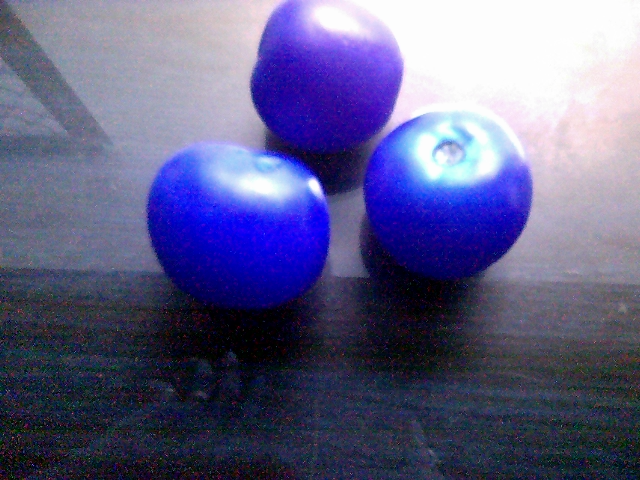

Image saved to: /content/captured_image.png


In [19]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
import PIL
from io import BytesIO
from google.colab.patches import cv2_imshow

# JavaScript to display the webcam feed and add a 'Capture' button
def js_capture_image():
    js = Javascript('''
    async function captureImage() {
        // Check if video and button elements already exist, if so, remove them
        const existingVideo = document.querySelector('video');
        const existingButton = document.querySelector('button');
        if (existingVideo) existingVideo.remove();
        if (existingButton) existingButton.remove();

        // Create video and button elements
        const video = document.createElement('video');
        const button = document.createElement('button');
        button.textContent = 'Capture';

        // Append video and button to the page
        document.body.appendChild(video);
        document.body.appendChild(button);

        // Set up webcam stream
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        video.style.width = '320px';
        await new Promise((resolve) => video.onloadedmetadata = resolve);
        video.play();

        // Wait for the 'Capture' button to be clicked
        await new Promise((resolve) => button.onclick = resolve);

        // Capture the image from the video stream
        const canvas = document.createElement('canvas');
        const context = canvas.getContext('2d');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        context.drawImage(video, 0, 0, canvas.width, canvas.height);

        // Stop the webcam and remove the video and button elements
        stream.getTracks().forEach(track => track.stop());
        video.remove();
        button.remove();

        // Return the captured image data
        return canvas.toDataURL('image/png');
    }
    captureImage();
    ''')
    display(js)

# Function to decode image and convert it to OpenCV format
def get_image():
    image_data = eval_js('captureImage()')
    image_bytes = b64decode(image_data.split(',')[1])
    image = np.array(PIL.Image.open(BytesIO(image_bytes)))
    return image

# Trigger the capture image process
js_capture_image()
image = get_image()

# Show the captured image
cv2_imshow(image)

# Save the image to /content/ (Colab file explorer section)
image_path = '/content/captured_image.png'
cv2.imwrite(image_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Display a message confirming the saved image path
print(f"Image saved to: {image_path}")

In [20]:
# Import necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import random

# Step 1: Load the trained/pretrained model
model = YOLO('/content/packed and unpacked .pt')  # Or use a pretrained model like 'yolov8n.pt'

# Step 2: Define the path to the image you want to test
image_path = '/content/captured_image.png'  # Input your image path here

# Step 3: Perform inference (test the model) on the image
# You can adjust iou=0.45 and agnostic_nms=True for more aggressive non-maximum suppression.
results = model.predict(source=image_path, conf=0.25, iou=0.45, agnostic_nms=False)

# Step 4: Load the image
img = cv2.imread(image_path)

# Step 5: Draw bounding boxes on the image
if results:
    detected_classes = set()  # To store detected class names
    for result in results:
        # Generate random colors for each class for better visibility
        colors = {cls: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for cls in result.names}

        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].int().tolist()  # Bounding box coordinates
            conf = box.conf[0]  # Confidence score
            cls = int(box.cls[0])  # Class ID

            label = f'{result.names[cls]} {conf:.2f}'  # Class label and confidence

            # Add class name to the set for displaying
            detected_classes.add(result.names[cls])

            # Choose a color for the bounding box based on the class
            color = colors[cls]

            # Draw rectangle and put the label on the image
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)  # Thicker line for clearer boxes
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Step 6: Convert the image to RGB for displaying in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 7: Display the image with bounding boxes and labels
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes for better viewing
plt.show()

# Step 8: Print out the detected class names
if detected_classes:
    print("Detected Classes:", ', '.join(detected_classes))
else:
    print("No classes detected.")



image 1/1 /content/captured_image.png: 480x640 1 unpacked, 176.6ms
Speed: 4.6ms preprocess, 176.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Detected Classes: unpacked
